## Import dependencies


In [1]:
# Import dependencies
%matplotlib inline 

# Import Python libraries
import math, time, random, datetime

# Import data manipulation libraries
import matplotlib.pyplot as plt
import missingno # library for visualization of missing data
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np

# Import preprocessing dependencies
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Import machine learning dependencies
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


## Explore overall dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import training and test data
train = pd.read_csv("/content/drive/MyDrive/Machine Learning Project Files/Data/Titanic Data/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Machine Learning Project Files/Data/Titanic Data/test.csv")
gender_submission = pd.read_csv("/content/drive/MyDrive/Machine Learning Project Files/Data/Titanic Data/gender_submission.csv")

In [4]:
# view the training data
train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

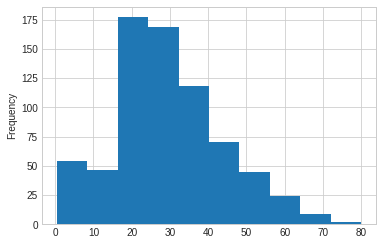

In [5]:
# Let's check the histogram of the ages of the passengers
train.Age.plot.hist()

In [6]:
# view the test data
test.head(10)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1  47.0      1      0     363272   7.0000   NaN        S  
2  62.0      0      0     240276   9.6875   NaN        Q  
3  27.0      0      0     315154   8.6625   NaN        S  
4  22.0      1      1    3101298  12.2875   NaN        S  
5  14.0      0      0       7538   9.2250   NaN        S  
6  30.0      0      0     330972   7.6292   NaN        Q  
7  26.0      1      1     248738  29.0000   NaN        S  
8  18.0      0      0       2657   7.2292   NaN        C  
9  21.0      2      0  A/4 48871  24.1500   NaN        S

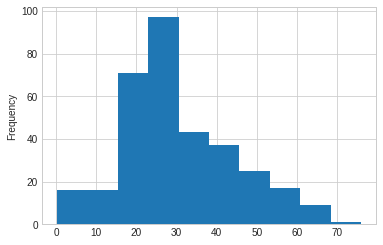

In [7]:
test.Age.plot.hist()

In [8]:
# check the length of train and test set
len(train), len(test)

(891, 418)

### Data description

**Survival:** 0 = No, 1 = Yes

**pclass:** 1=1st class, 2=2nd class, 3=3rd class

**sex:** Sex

**Age:** Age in years

**sibsp:** Number of siblings or spouses aboard the Titanic

**parch:** Number of parents or children aboard the Titanic

**ticket:** Ticket number

**fare:** Passenger fare

**cabin:** Cabin number

**embarked:** Port of embarkation, C=Cherbourg, Q=Queenstown, S=Southampton

In [9]:
# get the statistics of the training data
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

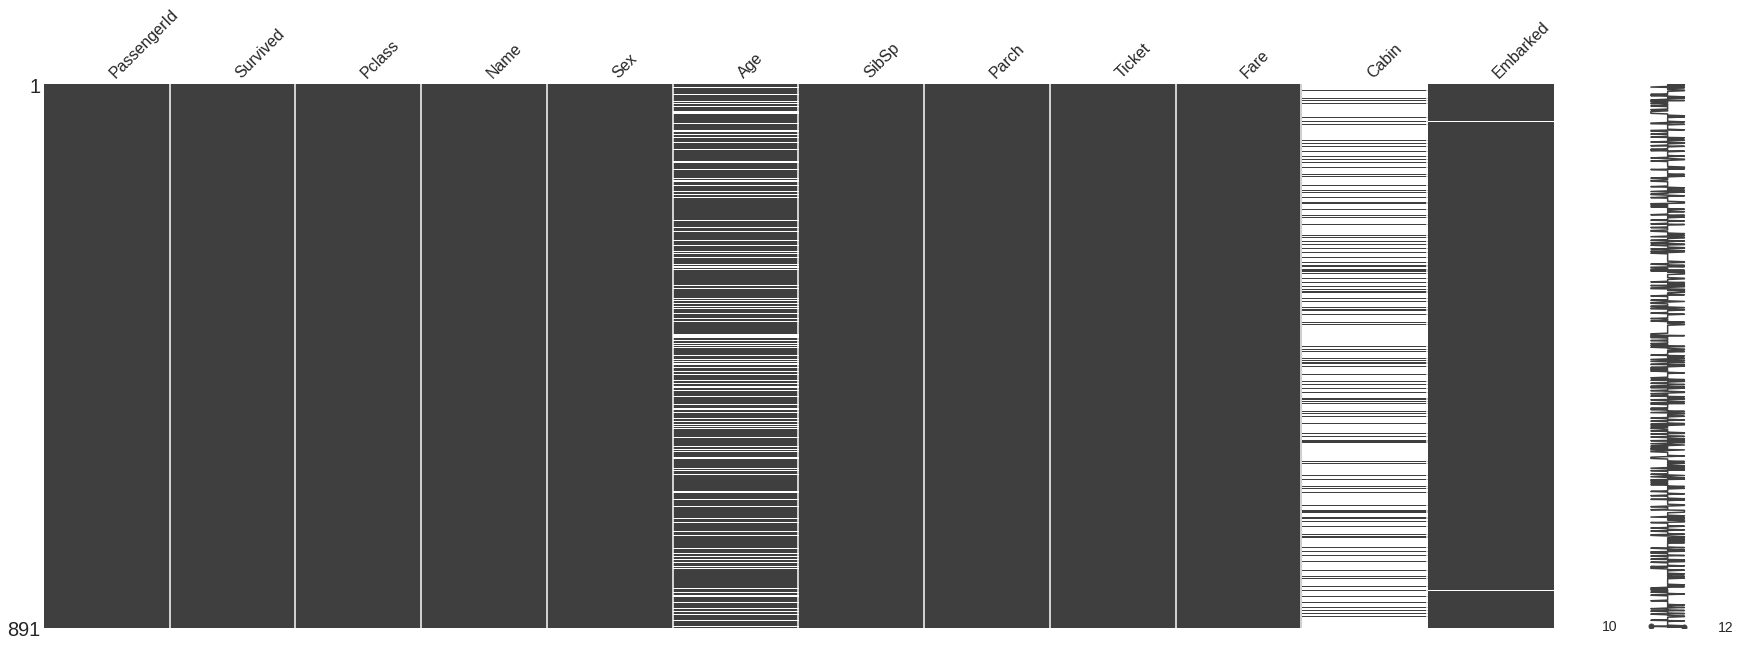

In [10]:
# plot graphic of missing values
missingno.matrix(train, figsize = (30,10))

Cabin and Age column has missing values

In [11]:
train.isnull().sum() # shows the number of missing values in each column
# finds null values of each column and adds them up

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Let's create two new dataframes. One for exploring discretized continuous variables (continuous variables that have been sorted into some kind of category) and another for exploring continuous values

In [12]:
# check the datatype of each column
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Explore each feature individually

In [13]:
df_bin = pd.DataFrame() # for descredised continuous variables
df_con = pd.DataFrame() # for continuous variables

### Target feature: Survived (predicted label)

0    549
1    342
Name: Survived, dtype: int64


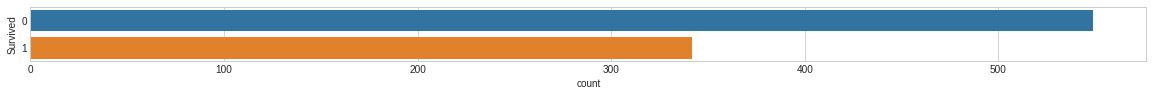

In [14]:
# how many people survived
fig = plt.figure(figsize=(20,1))
sns.countplot(y="Survived", data=train) # countplot is a kind of histogram that shows the occurances of certain categorical values
print(train.Survived.value_counts())

In [15]:
# Let's add this to our subset dataframe
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [16]:
df_bin.head()

Survived
0         0
1         1
2         1
3         1
4         0

In [17]:
df_con.head()

Survived
0         0
1         1
2         1
3         1
4         0

### Feature: Pclass

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


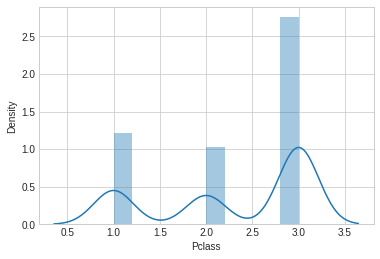

In [18]:
sns.distplot(train.Pclass) # distribution plot (plots distri ution and range of values)

In [19]:
df_bin["Pclass"] = train["Pclass"]
df_con["Pclass"] = train["Pclass"]

In [20]:
df_bin.head()

Survived  Pclass
0         0       3
1         1       1
2         1       3
3         1       1
4         0       3

### Feature: Name

In [21]:
# How many unique kinds of Ticket are there?
len(train.Name.unique())

891

All names are unique. That's too many unique values. So we will not add this column to our subset dataframe.

### Feature: Sex

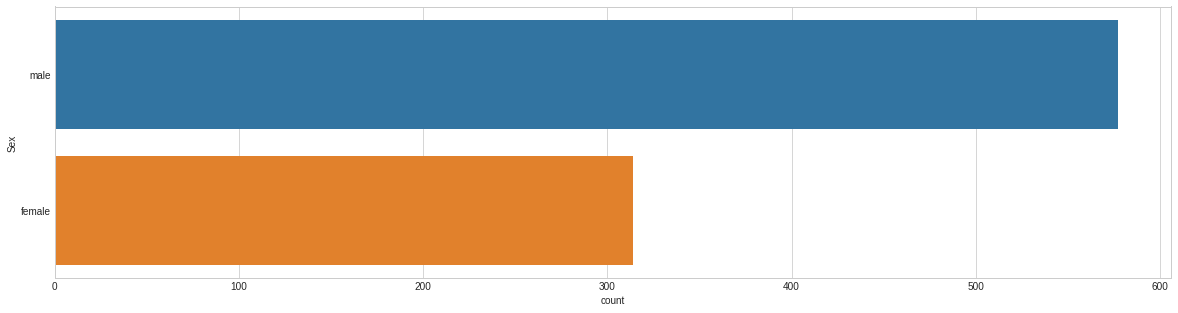

In [22]:
# Let's view the distribution of the sexes
plt.figure(figsize=(20,5))
sns.countplot(y="Sex", data=train)

In [23]:
# add sex to subset dataframes
df_bin['Sex']=train['Sex']
df_bin['Sex']=np.where(df_bin['Sex']=='female', 1, 0) # change sex to 0 for male and 1 female

df_con['Sex']=train['Sex']

New Function: np.where (look into its documentation)

In [24]:
df_bin.head()

Survived  Pclass  Sex
0         0       3    0
1         1       1    1
2         1       3    1
3         1       1    1
4         0       3    0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


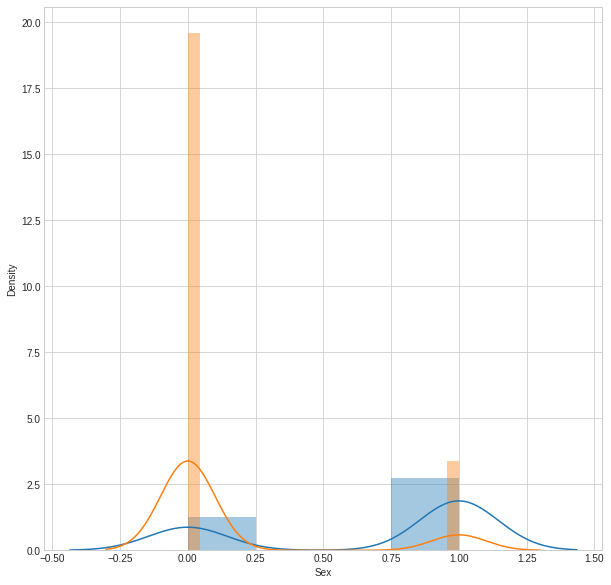

In [25]:
# Let's see how the Sex variable looks commpared to the Survived variable
# We can compare them because they both possess binary values
fig = plt.figure(figsize=(10,10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'}); 
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

New Function: sns.distplot (look into its documentation)




### Feature: Age

In [26]:
train.Age.isnull().sum() #total missing values in Age column

177

Function to create count and distribution visualizations (Please check countplot and distplot documentations)

In [27]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

### Feature: SibSp


In [28]:
# What values are there
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [29]:
# Add Sibsp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


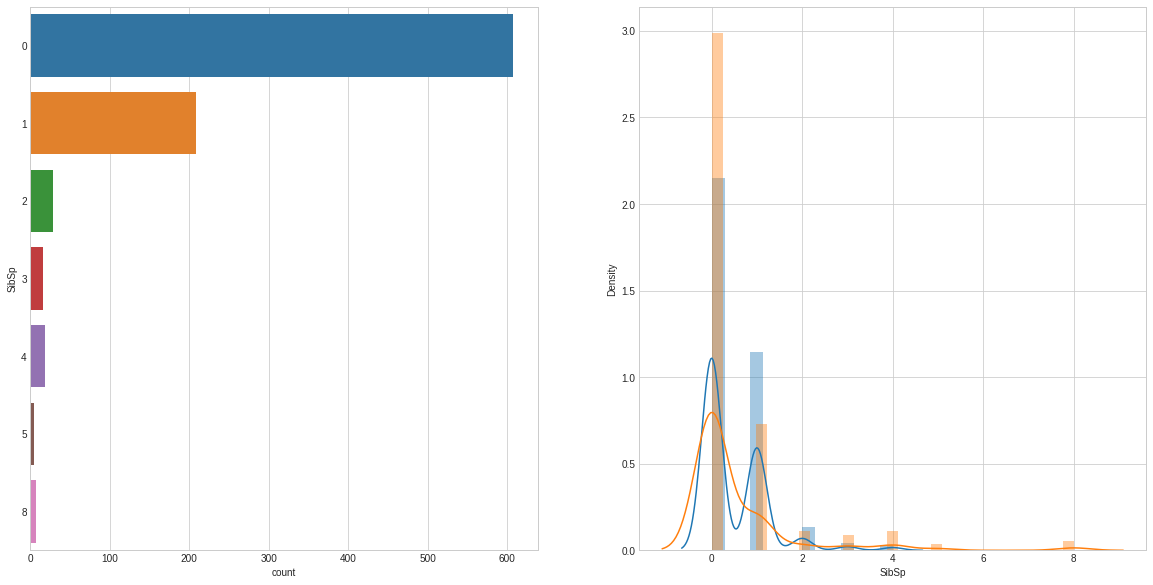

In [30]:
# Visualize the counts of SibSp and the distribution of the values against survived
plot_count_dist(train,
                bin_df=df_bin,
                label_column='Survived',
                target_column='SibSp',
                figsize=(20, 10))

### Feature: Parch


In [31]:
# What values are there
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [32]:
# Add Parch to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


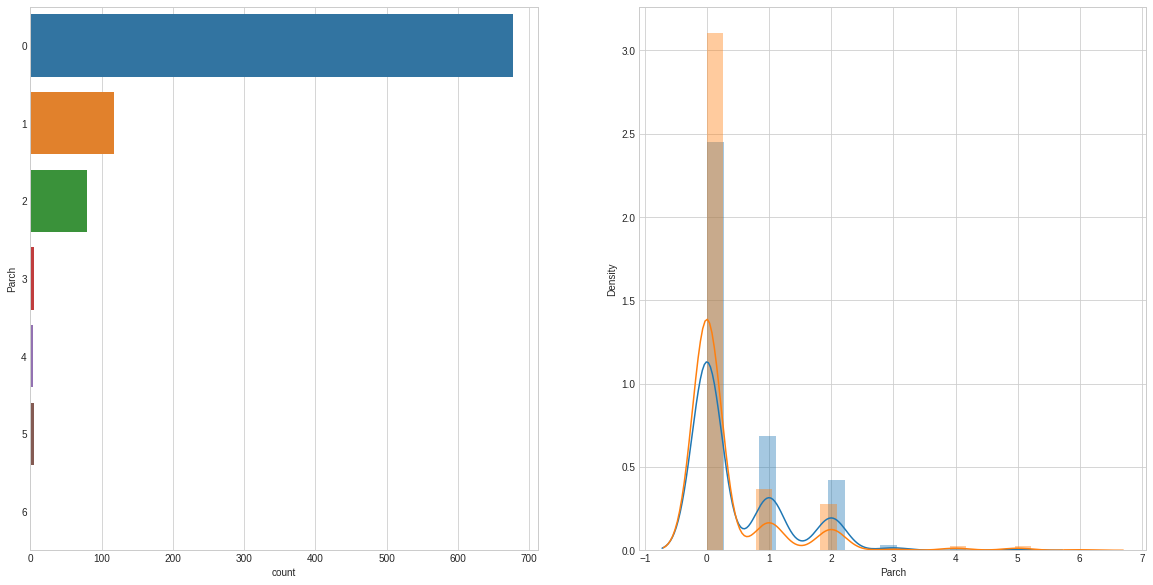

In [33]:
# Visualise the counts of Parch and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

### Feature: Ticket

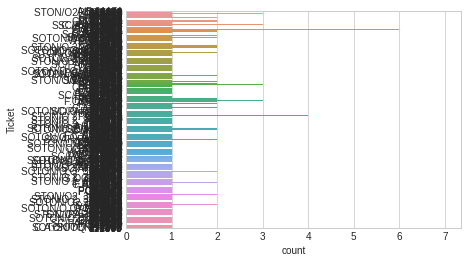

In [34]:
# How many kinds of ticket are there?
sns.countplot(y="Ticket", data=train);

In [35]:
# How many kinds of ticket are there?
train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [36]:
# How many unique kinds of Ticket are there?
len(train.Ticket.unique())

681

681 unique values is too many for now. So we won't use Ticket in our subset dataframes.

### Feature: Fare



In [37]:
# How many unique kinds of Fare are there?
len(train.Fare.unique())

248

In [38]:
# What kind of variable is Fare?
train.Fare.dtype

dtype('float64')

Because Fare is a float (number) let's add it as it is to our continuous sub dataframe but to add it to our categorical sub dataframe, we'll cut it into bins.

In [39]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised because the feature had continuous float values

In [40]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

In [41]:
df_con.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


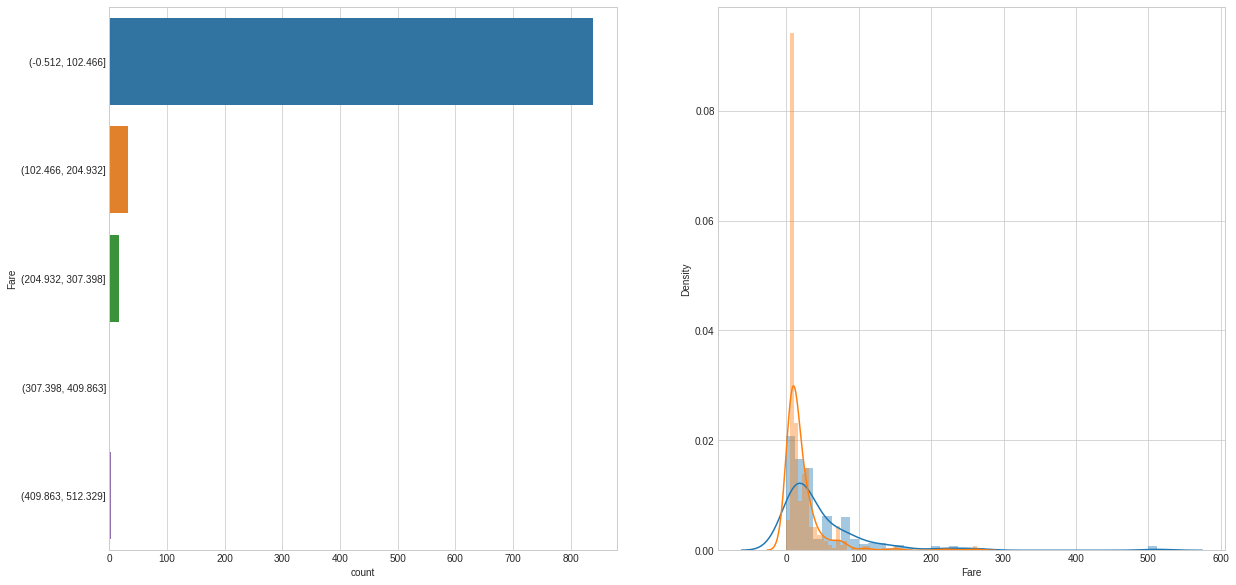

In [42]:
# Visualise the Fare bin counts as well as the Fare distribution versus Survived.
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

### Feature: Cabin

In [43]:
# how many missing values do we have in this column
train.Cabin.isnull().sum()

687

Since there are too many missing values, we won't use Cabin for our initial models and won't add it to our sub dataframes.

### Feature: Embarked

In [44]:
# How many missing values in this column
train.Embarked.isnull().sum()

2

In [45]:
# What kind of values are there in Embarked
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

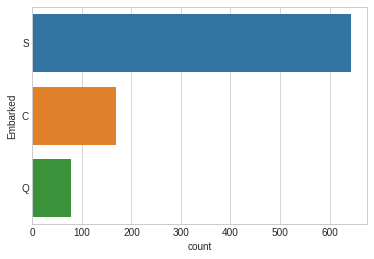

In [46]:
# Visualize the counts
sns.countplot(y='Embarked', data=train)

In [47]:
# For now let's remove the rows which don't have an Embarked value
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

# Remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


## Feature Encoding

Let's first check our two subset dataframes


In [48]:
df_bin.head() #discretized or binned 

Survived  Pclass  Sex  SibSp  Parch               Fare Embarked
0         0       3    0      1      0  (-0.512, 102.466]        S
1         1       1    1      1      0  (-0.512, 102.466]        C
2         1       3    1      0      0  (-0.512, 102.466]        S
3         1       1    1      1      0  (-0.512, 102.466]        S
4         0       3    0      0      0  (-0.512, 102.466]        S

In [49]:
df_con.head() # continuous

Survived  Pclass     Sex  SibSp  Parch     Fare Embarked
0         0       3    male      1      0   7.2500        S
1         1       1  female      1      0  71.2833        C
2         1       3  female      0      0   7.9250        S
3         1       1  female      1      0  53.1000        S
4         0       3    male      0      0   8.0500        S

In [50]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

Survived  Pclass_1  Pclass_2  Pclass_3  Sex_0  Sex_1  SibSp_0  SibSp_1  \
0         0         0         0         1      1      0        0        1   
1         1         1         0         0      0      1        0        1   
2         1         0         0         1      0      1        1        0   
3         1         1         0         0      0      1        0        1   
4         0         0         0         1      1      0        1        0   

   SibSp_2  SibSp_3  ...  Parch_5  Parch_6  Fare_(-0.512, 102.466]  \
0        0        0  ...        0        0                       1   
1        0        0  ...        0        0                       1   
2        0        0  ...        0        0                       1   
3        0        0  ...        0        0                       1   
4        0        0  ...        0        0                       1   

   Fare_(102.466, 204.932]  Fare_(204.932, 307.398]  Fare_(307.398, 409.863]  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   Fare_(409.863, 512.329]  Embarked_C  Embarked_Q  Embarked_S  
0                        0           0           0           1  
1                        0           1           0           0  
2                        0           0           0           1  
3                        0           0           0           1  
4                        0           0           0           1  

[5 rows x 28 columns]

In [51]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [52]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [53]:
# Let's look at df_con_enc
df_con_enc.head(20)

Survived  SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  \
0          0      1      0   7.2500           0           0           1   
1          1      1      0  71.2833           1           0           0   
2          1      0      0   7.9250           0           0           1   
3          1      1      0  53.1000           0           0           1   
4          0      0      0   8.0500           0           0           1   
5          0      0      0   8.4583           0           1           0   
6          0      0      0  51.8625           0           0           1   
7          0      3      1  21.0750           0           0           1   
8          1      0      2  11.1333           0           0           1   
9          1      1      0  30.0708           1           0           0   
10         1      1      1  16.7000           0           0           1   
11         1      0      0  26.5500           0           0           1   
12         0      0      0   8.0500           0           0           1   
13         0      1      5  31.2750           0           0           1   
14         0      0      0   7.8542           0           0           1   
15         1      0      0  16.0000           0           0           1   
16         0      4      1  29.1250           0           1           0   
17         1      0      0  13.0000           0           0           1   
18         0      1      0  18.0000           0           0           1   
19         1      0      0   7.2250           1           0           0   

    sex_female  sex_male  pclass_1  pclass_2  pclass_3  
0            0         1         0         0         1  
1            1         0         1         0         0  
2            1         0         0         0         1  
3            1         0         1         0         0  
4            0         1         0         0         1  
5            0         1         0         0         1  
6            0         1         1         0         0  
7            0         1         0         0         1  
8            1         0         0         0         1  
9            1         0         0         1         0  
10           1         0         0         0         1  
11           1         0         1         0         0  
12           0         1         0         0         1  
13           0         1         0         0         1  
14           1         0         0         0         1  
15           1         0         0         1         0  
16           0         1         0         0         1  
17           0         1         0         1         0  
18           1         0         0         0         1  
19           1         0         0         0         1

## Machine Learning Models

In [54]:
# Seclect the dataframe we want to use first for predictions
selected_df = df_con_enc

In [55]:
selected_df.head()

Survived  SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  \
0         0      1      0   7.2500           0           0           1   
1         1      1      0  71.2833           1           0           0   
2         1      0      0   7.9250           0           0           1   
3         1      1      0  53.1000           0           0           1   
4         0      0      0   8.0500           0           0           1   

   sex_female  sex_male  pclass_1  pclass_2  pclass_3  
0           0         1         0         0         1  
1           1         0         1         0         0  
2           1         0         0         0         1  
3           1         0         1         0         0  
4           0         1         0         0         1

In [56]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [57]:
# Shape of the data (without labels)
X_train.shape

(889, 11)

In [58]:
X_train.head()

SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  sex_female  \
0      1      0   7.2500           0           0           1           0   
1      1      0  71.2833           1           0           0           1   
2      0      0   7.9250           0           0           1           1   
3      1      0  53.1000           0           0           1           1   
4      0      0   8.0500           0           0           1           0   

   sex_male  pclass_1  pclass_2  pclass_3  
0         1         0         0         1  
1         0         1         0         0  
2         0         0         0         1  
3         0         1         0         0  
4         1         0         0         1

In [59]:
# Shape of the labels
y_train.shape

(889,)

In [60]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1) # cv is the number of folds of cross validation
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv, model

### Logistic Regression


In [61]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log, model_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:01.712596


### k-NN

In [62]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn, model_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors=3), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.46
Accuracy CV 10-Fold: 76.04
Running Time: 0:00:00.151992


### Gaussian Naive Bayes

In [63]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian, model_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.072783


### Linear Support Vector Classifier

In [64]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc, model_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Accuracy: 78.85
Accuracy CV 10-Fold: 77.28
Running Time: 0:00:00.401158


### Stochastic Gradient Descent Classifier

In [65]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd, model_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 78.85
Accuracy CV 10-Fold: 71.32
Running Time: 0:00:00.115656


### Decision Tree Classifier

In [66]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt, model_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.54
Running Time: 0:00:00.086368


### Gradient Boosting Trees

In [67]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt, model_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.61
Accuracy CV 10-Fold: 80.65
Running Time: 0:00:00.959022


### Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
train_pred_rf, acc_rf, acc_cv_rf, model_rf = fit_ml_algo(RandomForestClassifier(n_estimators=50), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.2
Running Time: 0:00:00.878361


### Voting Classifier

In [69]:
from sklearn.ensemble import VotingClassifier
start_time = time.time()
train_pred_vt, acc_vt, acc_cv_vt, model_vt = fit_ml_algo(VotingClassifier(estimators=[('rf', model_rf), ('gbt', model_gbt), ('dt', model_dt), ('knn', model_knn)], voting="soft"), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
vt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_vt)
print("Accuracy CV 10-Fold: %s" % acc_cv_vt)
print("Running Time: %s" % datetime.timedelta(seconds=vt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 81.1
Running Time: 0:00:01.880597


### Catboost Algorithm

In [70]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [71]:
from catboost import CatBoostClassifier, Pool, cv

In [72]:
# View the data for the CatBoost model
X_train.head()

SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  sex_female  \
0      1      0   7.2500           0           0           1           0   
1      1      0  71.2833           1           0           0           1   
2      0      0   7.9250           0           0           1           1   
3      1      0  53.1000           0           0           1           1   
4      0      0   8.0500           0           0           1           0   

   sex_male  pclass_1  pclass_2  pclass_3  
0         1         0         0         1  
1         0         1         0         0  
2         0         0         0         1  
3         0         1         0         0  
4         1         0         0         1

In [73]:
# View the labels for the CatBoost model
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [74]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10])

In [75]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [76]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6862830	total: 52.3ms	remaining: 52.2s
1:	learn: 0.6809444	total: 54.6ms	remaining: 27.3s
2:	learn: 0.6751692	total: 57.4ms	remaining: 19.1s
3:	learn: 0.6689060	total: 60.1ms	remaining: 15s
4:	learn: 0.6632144	total: 62.9ms	remaining: 12.5s
5:	learn: 0.6576488	total: 65ms	remaining: 10.8s
6:	learn: 0.6544441	total: 67.1ms	remaining: 9.52s
7:	learn: 0.6490635	total: 69.8ms	remaining: 8.65s
8:	learn: 0.6443241	total: 72.6ms	remaining: 7.99s
9:	learn: 0.6395935	total: 75.2ms	remaining: 7.45s
10:	learn: 0.6345186	total: 77.3ms	remaining: 6.95s
11:	learn: 0.6305316	total: 79.9ms	remaining: 6.58s
12:	learn: 0.6275610	total: 81.3ms	remaining: 6.17s
13:	learn: 0.6225020	total: 84ms	remaining: 5.92s
14:	learn: 0.6179503	total: 86.8ms	remaining: 5.7s
15:	learn: 0.6140480	total: 88.2ms	remaining: 5.42s
16:	learn: 0.6100034	total: 90.2ms	remaining: 5.21s
17:	learn: 0.6049646	total: 92.7ms	remaining: 5.06s
18:	learn: 0.6025760	total: 93.9ms	remaining: 4.85s

In [77]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
24:	learn: 0.4893301	test: 0.4638872	best: 0.4638872 (24)	total: 80.9ms	remaining: 3.15s
25:	learn: 0.4846609	test: 0.4581783	best: 0.4581783 (25)	total: 83.5ms	remaining: 3.13s
26:	learn: 0.4812979	test: 0.4546720	best: 0.4546720 (26)	total: 87.1ms	remaining: 3.14s
27:	learn: 0.4773794	test: 0.4509130	best: 0.4509130 (27)	total: 89.9ms	remaining: 3.12s
28:	learn: 0.4759959	test: 0.4490016	best: 0.4490016 (28)	total: 91.2ms	remaining: 3.05s
29:	learn: 0.4726830	test: 0.4445672	best: 0.4445672 (29)	total: 98.6ms	remaining: 3.19s
30:	learn: 0.4686808	test: 0.4400542	best: 0.4400542 (30)	total: 104ms	remaining: 3.25s
31:	learn: 0.4656687	test: 0.4373876	best: 0.4373876 (31)	total: 107ms	remaining: 3.22s
32:	learn: 0.4629759	test: 0.4342703	best: 0.4342703 (32)	total: 114ms	remaining: 3.34s
33:	learn: 0.4619416	test: 0.4328279	best: 0.4328279 (33)	total: 119ms	remaining: 3.38s
34:	learn: 0.4610411	test: 0.4314925	best: 0.4314925 (34)	total

In [78]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 83.91
Accuracy cross-validation 10-Fold: 81.32
Running Time: 0:01:11.147966


## Model Results

In [79]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'Random Forests', 'Voting Classifier',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_rf,
        acc_vt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


Model  Score
5               Decision Tree  92.46
7              Random Forests  92.46
8           Voting Classifier  92.46
6     Gradient Boosting Trees  86.61
9                    CatBoost  83.91
0                         KNN  83.46
1         Logistic Regression  79.98
3  Stochastic Gradient Decent  78.85
4                  Linear SVC  78.85
2                 Naive Bayes  78.52

In [80]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'Random Forest', 'Voting Classifier',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_rf,
        acc_cv_vt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


Model  Score
9                    CatBoost  81.32
8           Voting Classifier  81.10
6     Gradient Boosting Trees  80.65
5               Decision Tree  80.54
7               Random Forest  80.20
1         Logistic Regression  79.42
2                 Naive Bayes  77.95
4                  Linear SVC  77.28
0                         KNN  76.04
3  Stochastic Gradient Decent  71.32

## Feature Importance


Which features were most important for making predictions?

In [81]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png') 

imp         col
4    0.992061  embarked_Q
3    1.213711  embarked_C
5    1.677219  embarked_S
9    2.178083    pclass_2
8    3.243021    pclass_1
0   10.797435       SibSp
10  11.205450    pclass_3
1   13.988886       Parch
2   15.753218        Fare
6   17.695520  sex_female
7   21.255397    sex_male

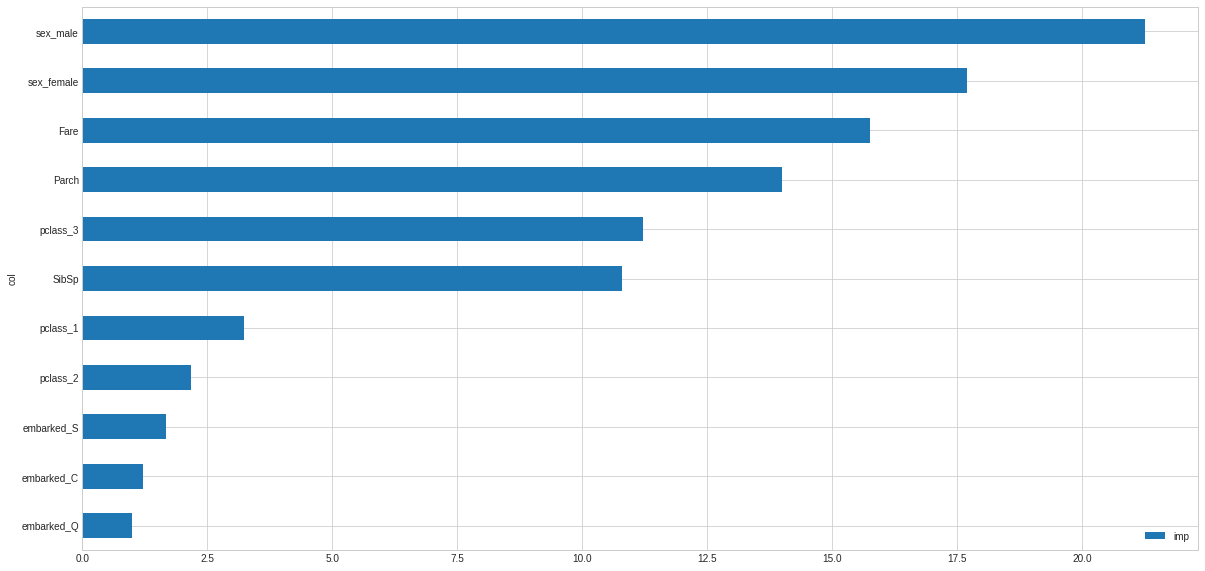

In [82]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

## Precision, Recall, F1, and AUC Scores

In [83]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8286662683284687
Recall: 0.6833382352941176
F1: 0.7489789466084935
AUC: 0.8842839467480982


## Submission

In [84]:
# Our test dataframe has some columns our model hasn't been trained on
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [85]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [86]:
# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [87]:
# Let's look at test, it should have one hot encoded columns now
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  embarked_C  \
0  34.5      0      0   330911   7.8292   NaN        Q           0   
1  47.0      1      0   363272   7.0000   NaN        S           0   
2  62.0      0      0   240276   9.6875   NaN        Q           0   
3  27.0      0      0   315154   8.6625   NaN        S           0   
4  22.0      1      1  3101298  12.2875   NaN        S           0   

   embarked_Q  embarked_S  sex_female  sex_male  pclass_1  pclass_2  pclass_3  
0           1           0           0         1         0         0         1  
1           0           1           1         0         0         0         1  
2           1           0           0         1         0         1         0  
3           0           1           0         1         0         0         1  
4           0           1           1         0         0         0         1

We converted the columns in the test set to the same format as df_con_enc

In [88]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [89]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns])

In [90]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

In [91]:
# What does our submission have to look like?
gender_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [92]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [93]:
# How does our submission dataframe look?
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

In [94]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [96]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!
